In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
sns.set(color_codes=True)
import glob
import math

In [2]:
import os
import time
import unicodedata
import sklearn
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from pandas_datareader import data as pdr
from pylab import rcParams
from tqdm import tqdm_notebook
from xgboost import XGBRegressor
from datetime import date
from matplotlib import pyplot as plt

In [3]:
path = '/Users/kate/CSCE633/amazon'
all_files = glob.glob(path + "/*.csv")
li = []
index = ["DATETIME", "OPEN", "HIGH", "LOW", "CLOSE", "VOLUME", "NUMBER OF TRADES", "WEIGHTED AV. PRICE"]
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None, names=index)
    li.append(df)

amazon = pd.concat(li, axis=0, ignore_index=True, sort=False)

In [4]:
# amazon = pd.DataFrame(amazon.DATETIME.str.split(' ',1).tolist(),
#                                    columns = ['DATE','TIME'])
amazon[['DATE','TIME']] = amazon.DATETIME.str.split(expand=True)
amazon[["YEAR", "MONTH", "DAY"]] = amazon.DATE.str.split(".", expand=True)
amazon[["HOUR", "MINUTES", "SECONDS"]] = amazon.TIME.str.split(":", expand=True)

In [5]:
amazon.loc[:, 'DATE'] = pd.to_datetime(amazon['DATE'],format='%Y.%m.%d')
amazon = amazon.sort_values(['DATETIME'])

In [6]:
new_amazon = amazon
amazon.head()


,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,MONTH,DAY,HOUR,MINUTES,SECONDS
8773,2004.01.23 09:30:00,57.10,57.10,56.80,56.62,6487,2270,56.855,2004-01-23,09:30:00,2004,01,23,09,30,00
8774,2004.01.23 10:00:00,56.82,57.40,57.34,56.76,11549,3987,57.150,2004-01-23,10:00:00,2004,01,23,10,00,00
8775,2004.01.23 11:00:00,57.31,57.34,57.26,56.91,8572,2643,57.136,2004-01-23,11:00:00,2004,01,23,11,00,00
8776,2004.01.23 12:00:00,57.26,57.61,57.34,57.22,7622,2629,57.393,2004-01-23,12:00:00,2004,01,23,12,00,00
8777,2004.01.23 13:00:00,57.35,57.60,57.12,57.11,4841,1450,57.296,2004-01-23,13:00:00,2004,01,23,13,00,00


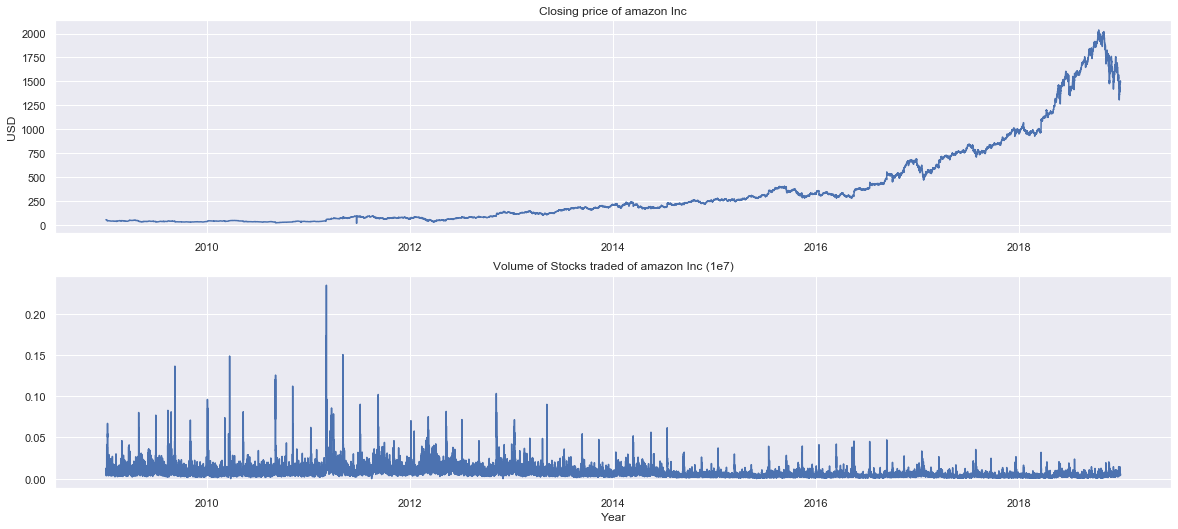

In [9]:
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.notebook_repr_html', True)
# pd.set_option('display.width', 1500)
# pd.set_option('display.max_columns', 100)
fig,ax=plt.subplots(2,1,figsize=(20,5))
plt.subplots_adjust(left=None, bottom=0.1, right=None, top=1.4, wspace=None, hspace=None)
date = np.linspace(2009, 2019, num = 26208)
ax[0].plot(date, amazon['CLOSE'])
ax[0].set_title('Closing price of amazon Inc')
ax[0].set_ylabel("USD")

ax[1].plot(date, amazon['VOLUME']/1000000)
ax[1].set_title('Volume of Stocks traded of amazon Inc (1e7)')
ax[1].set_xlabel("Year")

plt.show()

Text(0, 0.5, 'USD')

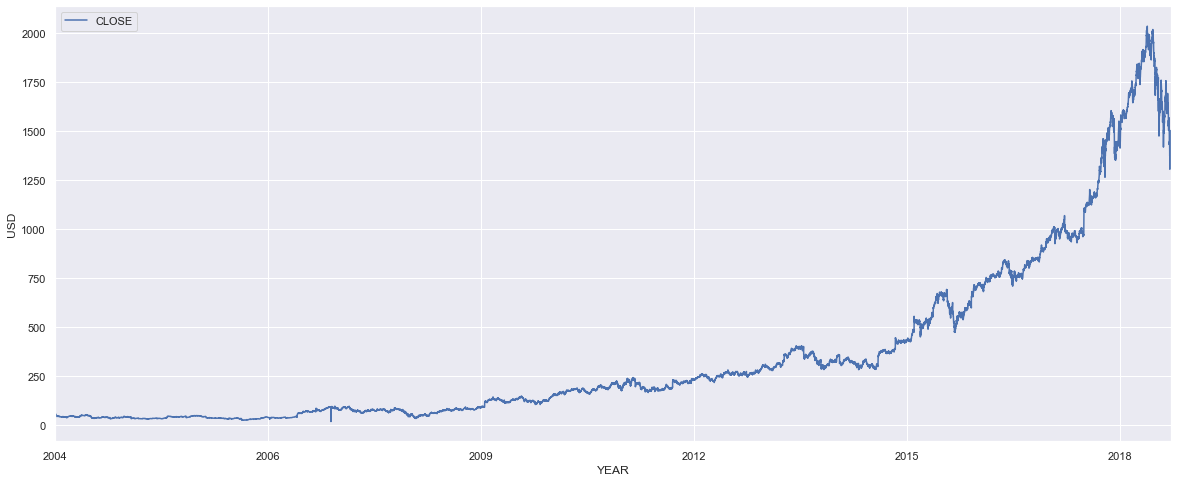

In [10]:
rcParams['figure.figsize'] = 20, 8 # width 10, height 8

ax = amazon.plot(x='YEAR', y='CLOSE', style='b-', grid=True)
ax.set_xlabel("YEAR")
ax.set_ylabel("USD")

In [11]:
amazon.head()

,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,MONTH,DAY,HOUR,MINUTES,SECONDS
8773,2004.01.23 09:30:00,57.10,57.10,56.80,56.62,6487,2270,56.855,2004-01-23,09:30:00,2004,01,23,09,30,00
8774,2004.01.23 10:00:00,56.82,57.40,57.34,56.76,11549,3987,57.150,2004-01-23,10:00:00,2004,01,23,10,00,00
8775,2004.01.23 11:00:00,57.31,57.34,57.26,56.91,8572,2643,57.136,2004-01-23,11:00:00,2004,01,23,11,00,00
8776,2004.01.23 12:00:00,57.26,57.61,57.34,57.22,7622,2629,57.393,2004-01-23,12:00:00,2004,01,23,12,00,00
8777,2004.01.23 13:00:00,57.35,57.60,57.12,57.11,4841,1450,57.296,2004-01-23,13:00:00,2004,01,23,13,00,00


Text(0, 0.5, 'USD')

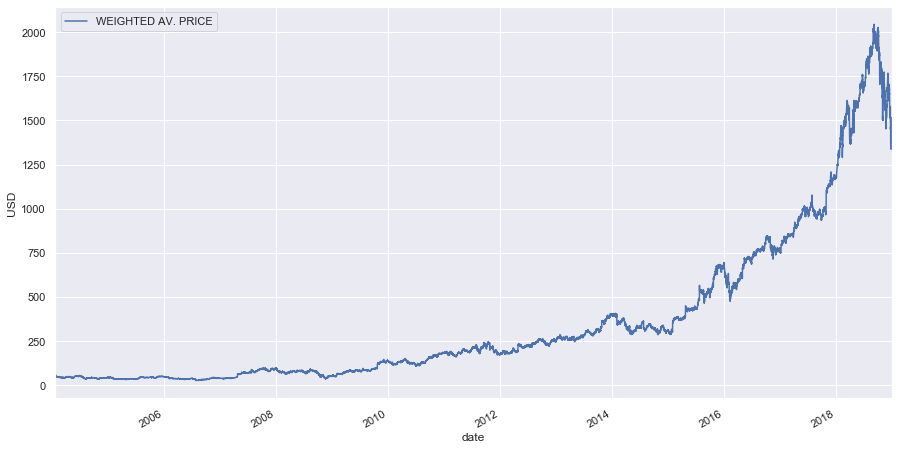

In [12]:
rcParams['figure.figsize'] = 15, 8 # width 10, height 8

ax = amazon.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [13]:
# Get difference between high and low of each hour
amazon['RANGE_HL'] = amazon['HIGH'] - amazon['LOW']
#df.drop(['high', 'low'], axis=1, inplace=True)

# Get difference between open and close of each hour
amazon['RANGE_OC'] = amazon['OPEN'] - amazon['CLOSE']
#df.drop(['open', 'close'], axis=1, inplace=True)

amazon.head(10)

,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,MONTH,DAY,HOUR,MINUTES,SECONDS,RANGE_HL,RANGE_OC
8773,2004.01.23 09:30:00,57.10,57.10,56.80,56.62,6487,2270,56.855,2004-01-23,09:30:00,2004,01,23,09,30,00,0.30,0.48
8774,2004.01.23 10:00:00,56.82,57.40,57.34,56.76,11549,3987,57.150,2004-01-23,10:00:00,2004,01,23,10,00,00,0.06,0.06
8775,2004.01.23 11:00:00,57.31,57.34,57.26,56.91,8572,2643,57.136,2004-01-23,11:00:00,2004,01,23,11,00,00,0.08,0.40
8776,2004.01.23 12:00:00,57.26,57.61,57.34,57.22,7622,2629,57.393,2004-01-23,12:00:00,2004,01,23,12,00,00,0.27,0.04
8777,2004.01.23 13:00:00,57.35,57.60,57.12,57.11,4841,1450,57.296,2004-01-23,13:00:00,2004,01,23,13,00,00,0.48,0.24
8778,2004.01.23 14:00:00,57.10,57.30,57.25,57.00,6581,1865,57.165,2004-01-23,14:00:00,2004,01,23,14,00,00,0.05,0.10
8779,2004.01.23 15:00:00,57.24,57.30,57.14,56.89,11850,4139,57.108,2004-01-23,15:00:00,2004,01,23,15,00,00,0.16,0.35
8780,2004.01.26 09:30:00,56.81,56.82,56.62,56.34,9126,2429,56.611,2004-01-26,09:30:00,2004,01,26,09,30,00,0.20,0.47
8781,2004.01.26 10:00:00,56.62,56.69,56.50,56.31,9897,3107,56.517,2004-01-26,10:00:00,2004,01,26,10,00,00,0.19,0.31
8782,2004.01.26 11:00:00,56.51,56.60,56.58,56.30,5756,1853,56.428,2004-01-26,11:00:00,2004,01,26,11,00,00,0.02,0.21


In [14]:
 amazon.drop(['HIGH', 'LOW', 'OPEN', 'CLOSE', 'DATETIME', 'MONTH', 'DAY', 'MINUTES', 'SECONDS'], axis=1, inplace=True)

In [15]:
amazon.head(10)

,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC
8773,6487,2270,56.855,2004-01-23,09:30:00,2004,09,0.30,0.48
8774,11549,3987,57.150,2004-01-23,10:00:00,2004,10,0.06,0.06
8775,8572,2643,57.136,2004-01-23,11:00:00,2004,11,0.08,0.40
8776,7622,2629,57.393,2004-01-23,12:00:00,2004,12,0.27,0.04
8777,4841,1450,57.296,2004-01-23,13:00:00,2004,13,0.48,0.24
8778,6581,1865,57.165,2004-01-23,14:00:00,2004,14,0.05,0.10
8779,11850,4139,57.108,2004-01-23,15:00:00,2004,15,0.16,0.35
8780,9126,2429,56.611,2004-01-26,09:30:00,2004,09,0.20,0.47
8781,9897,3107,56.517,2004-01-26,10:00:00,2004,10,0.19,0.31
8782,5756,1853,56.428,2004-01-26,11:00:00,2004,11,0.02,0.21


In [16]:
amazon['ORDER_HOURS'] = [x for x in list(range(len(amazon)))]

# merging_keys
merging_keys = ['ORDER_HOURS']

# List of columns that we will use to create lags
lag_cols = ['WEIGHTED AV. PRICE', 'RANGE_HL', 'RANGE_OC', 'VOLUME']
lag_cols

['WEIGHTED AV. PRICE', 'RANGE_HL', 'RANGE_OC', 'VOLUME']

In [17]:
amazon.head(10)

,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,ORDER_HOURS
8773,6487,2270,56.855,2004-01-23,09:30:00,2004,09,0.30,0.48,0
8774,11549,3987,57.150,2004-01-23,10:00:00,2004,10,0.06,0.06,1
8775,8572,2643,57.136,2004-01-23,11:00:00,2004,11,0.08,0.40,2
8776,7622,2629,57.393,2004-01-23,12:00:00,2004,12,0.27,0.04,3
8777,4841,1450,57.296,2004-01-23,13:00:00,2004,13,0.48,0.24,4
8778,6581,1865,57.165,2004-01-23,14:00:00,2004,14,0.05,0.10,5
8779,11850,4139,57.108,2004-01-23,15:00:00,2004,15,0.16,0.35,6
8780,9126,2429,56.611,2004-01-26,09:30:00,2004,09,0.20,0.47,7
8781,9897,3107,56.517,2004-01-26,10:00:00,2004,10,0.19,0.31,8
8782,5756,1853,56.428,2004-01-26,11:00:00,2004,11,0.02,0.21,9


In [18]:
N = 7
shift_range = [x+1 for x in range(N)]

for shift in tqdm_notebook(shift_range):
    train_shift = amazon[merging_keys + lag_cols].copy()
    
    # E.g. order_day of 0 becomes 1, for shift = 1.
    # So when this is merged with order_day of 1 in df, this will represent lag of 1.
    train_shift['ORDER_HOURS'] = train_shift['ORDER_HOURS'] + shift
    
    foo = lambda x: '{}_lag_{}'.format(x, shift) if x in lag_cols else x
    train_shift = train_shift.rename(columns=foo)

    amazon = pd.merge(amazon, train_shift, on=merging_keys, how='left') #.fillna(0)
    
    del train_shift

# Remove the first N rows which contain NaNs
amazon = amazon[N:]
    
amazon.head(10)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,ORDER_HOURS,...,RANGE_OC_lag_5,VOLUME_lag_5,WEIGHTED AV. PRICE_lag_6,RANGE_HL_lag_6,RANGE_OC_lag_6,VOLUME_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_7,RANGE_OC_lag_7,VOLUME_lag_7
7,9126,2429,56.611,2004-01-26,09:30:00,2004,09,0.20,0.47,7,...,0.40,8572.0,57.150,0.06,0.06,11549.0,56.855,0.30,0.48,6487.0
8,9897,3107,56.517,2004-01-26,10:00:00,2004,10,0.19,0.31,8,...,0.04,7622.0,57.136,0.08,0.40,8572.0,57.150,0.06,0.06,11549.0
9,5756,1853,56.428,2004-01-26,11:00:00,2004,11,0.02,0.21,9,...,0.24,4841.0,57.393,0.27,0.04,7622.0,57.136,0.08,0.40,8572.0
10,3449,1136,56.594,2004-01-26,12:00:00,2004,12,0.11,0.09,10,...,0.10,6581.0,57.296,0.48,0.24,4841.0,57.393,0.27,0.04,7622.0
11,6885,1946,56.661,2004-01-26,13:00:00,2004,13,0.18,0.20,11,...,0.35,11850.0,57.165,0.05,0.10,6581.0,57.296,0.48,0.24,4841.0
12,5507,2001,56.875,2004-01-26,14:00:00,2004,14,0.14,0.38,12,...,0.47,9126.0,57.108,0.16,0.35,11850.0,57.165,0.05,0.10,6581.0
13,11775,3447,56.961,2004-01-26,15:00:00,2004,15,0.07,0.14,13,...,0.31,9897.0,56.611,0.20,0.47,9126.0,57.108,0.16,0.35,11850.0
14,13265,3088,57.300,2004-01-27,09:30:00,2004,09,0.39,0.04,14,...,0.21,5756.0,56.517,0.19,0.31,9897.0,56.611,0.20,0.47,9126.0
15,11585,3434,57.165,2004-01-27,10:00:00,2004,10,0.38,0.48,15,...,0.09,3449.0,56.428,0.02,0.21,5756.0,56.517,0.19,0.31,9897.0
16,13365,3533,56.784,2004-01-27,11:00:00,2004,11,0.27,0.67,16,...,0.20,6885.0,56.594,0.11,0.09,3449.0,56.428,0.02,0.21,5756.0


In [19]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26201 entries, 7 to 26207
Data columns (total 38 columns):
VOLUME                      26201 non-null int64
NUMBER OF TRADES            26201 non-null int64
WEIGHTED AV. PRICE          26201 non-null float64
DATE                        26201 non-null datetime64[ns]
TIME                        26201 non-null object
YEAR                        26201 non-null object
HOUR                        26201 non-null object
RANGE_HL                    26201 non-null float64
RANGE_OC                    26201 non-null float64
ORDER_HOURS                 26201 non-null int64
WEIGHTED AV. PRICE_lag_1    26201 non-null float64
RANGE_HL_lag_1              26201 non-null float64
RANGE_OC_lag_1              26201 non-null float64
VOLUME_lag_1                26201 non-null float64
WEIGHTED AV. PRICE_lag_2    26201 non-null float64
RANGE_HL_lag_2              26201 non-null float64
RANGE_OC_lag_2              26201 non-null float64
VOLUME_lag_2              

In [20]:
def get_mov_avg_std(df, col, N):
    """
    Given a dataframe, get mean and std dev at timestep t using values from t-1, t-2, ..., t-N.
    Inputs
        df         : dataframe. Can be of any length.
        col        : name of the column you want to calculate mean and std dev
        N          : get mean and std dev at timestep t using values from t-1, t-2, ..., t-N
    Outputs
        df_out     : same as df but with additional column containing mean and std dev
    """
    mean_list = df[col].rolling(window = N, min_periods=1).mean() # len(mean_list) = len(df)
    std_list = df[col].rolling(window = N, min_periods=1).std()   # first value will be NaN, because normalized by N-1
    
    # Add one timestep to the predictions
    mean_list = np.concatenate((np.array([np.nan]), np.array(mean_list[:-1])))
    std_list = np.concatenate((np.array([np.nan]), np.array(std_list[:-1])))
    
    # Append mean_list to df
    df_out = df.copy()
    df_out[col + '_mean'] = mean_list
    df_out[col + '_std'] = std_list
    
    return df_out

In [21]:
cols_list = [
"WEIGHTED AV. PRICE",
"RANGE_HL",
"RANGE_OC",
"VOLUME"
]


for col in cols_list:
    amazon = get_mov_avg_std(amazon, col, N)
amazon.head()

,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,ORDER_HOURS,...,RANGE_OC_lag_7,VOLUME_lag_7,WEIGHTED AV. PRICE_mean,WEIGHTED AV. PRICE_std,RANGE_HL_mean,RANGE_HL_std,RANGE_OC_mean,RANGE_OC_std,VOLUME_mean,VOLUME_std
7,9126,2429,56.611,2004-01-26,09:30:00,2004,09,0.20,0.47,7,...,0.48,6487.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9897,3107,56.517,2004-01-26,10:00:00,2004,10,0.19,0.31,8,...,0.06,11549.0,56.611000,NaN,0.200000,NaN,0.47,NaN,9126.000000,NaN
9,5756,1853,56.428,2004-01-26,11:00:00,2004,11,0.02,0.21,9,...,0.40,8572.0,56.564000,0.066468,0.195000,0.007071,0.39,0.113137,9511.500000,545.179328
10,3449,1136,56.594,2004-01-26,12:00:00,2004,12,0.11,0.09,10,...,0.04,7622.0,56.518667,0.091511,0.136667,0.101160,0.33,0.131149,8259.666667,2202.242115
11,6885,1946,56.661,2004-01-26,13:00:00,2004,13,0.18,0.20,11,...,0.24,4841.0,56.537500,0.083676,0.130000,0.083666,0.27,0.160831,7057.000000,3003.144241


In [22]:
cv_size = 0.0
test_size = 0.2
# Get sizes of each of the datasets
num_cv = int(cv_size*len(amazon))
num_test = int(test_size*len(amazon))
num_train = len(amazon) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

# Split into train, cv, and test
train = amazon[:num_train]
cv = amazon[num_train:num_train+num_cv]
train_cv = amazon[:num_train+num_cv]
test = amazon[num_train+num_cv:]
print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train = 20961
num_cv = 0
num_test = 5240
train.shape = (20961, 46)
cv.shape = (0, 46)
train_cv.shape = (20961, 46)
test.shape = (5240, 46)


In [23]:
cols_to_scale = [
"WEIGHTED AV. PRICE"
]
N = 7
for i in range(1,N+1):
    cols_to_scale.append("WEIGHTED AV. PRICE_lag_"+str(i))
    cols_to_scale.append("RANGE_HL_lag_"+str(i))
    cols_to_scale.append("RANGE_OC_lag_"+str(i))
    cols_to_scale.append("VOLUME_lag_"+str(i))

# Do scaling for train set
# Here we only scale the train dataset, and not the entire dataset to prevent information leak
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[cols_to_scale])
print("scaler.mean_ = " + str(scaler.mean_))
print("scaler.var_ = " + str(scaler.var_))
print("train_scaled.shape = " + str(train_scaled.shape))

# Convert the numpy array back into pandas dataframe
train_scaled = pd.DataFrame(train_scaled, columns=cols_to_scale)
train_scaled[['DATE', 'HOUR']] = train.reset_index()[['DATE', 'HOUR']]
print("train_scaled.shape = " + str(train_scaled.shape))
train_scaled.head()

scaler.mean_ = [1.68345810e+02 1.68318562e+02 7.67483422e-01 7.88837365e-01
 8.47911750e+03 1.68291277e+02 7.67316445e-01 7.88664663e-01
 8.47924088e+03 1.68263784e+02 7.67079338e-01 7.88421354e-01
 8.47930843e+03 1.68236177e+02 7.66913792e-01 7.88213826e-01
 8.47950241e+03 1.68208536e+02 7.66796431e-01 7.88012022e-01
 8.47959768e+03 1.68181205e+02 7.66773055e-01 7.87934259e-01
 8.47970431e+03 1.68153669e+02 7.66651400e-01 7.87839321e-01
 8.47974176e+03]
scaler.var_ = [1.99895636e+04 1.99800623e+04 1.15546264e+00 1.43826153e+00
 7.23176714e+07 1.99705231e+04 1.15511780e+00 1.43787425e+00
 7.23168840e+07 1.99607817e+04 1.15407557e+00 1.43690030e+00
 7.23162968e+07 1.99509271e+04 1.15366568e+00 1.43630815e+00
 7.23151755e+07 1.99410534e+04 1.15353819e+00 1.43561117e+00
 7.23150028e+07 1.99314656e+04 1.15355978e+00 1.43559763e+00
 7.23154191e+07 1.99217025e+04 1.15336312e+00 1.43546716e+00
 7.23152404e+07]
train_scaled.shape = (20961, 29)
train_scaled.shape = (20961, 31)


,WEIGHTED AV. PRICE,WEIGHTED AV. PRICE_lag_1,RANGE_HL_lag_1,RANGE_OC_lag_1,VOLUME_lag_1,WEIGHTED AV. PRICE_lag_2,RANGE_HL_lag_2,RANGE_OC_lag_2,VOLUME_lag_2,WEIGHTED AV. PRICE_lag_3,...,WEIGHTED AV. PRICE_lag_6,RANGE_HL_lag_6,RANGE_OC_lag_6,VOLUME_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_7,RANGE_OC_lag_7,VOLUME_lag_7,DATE,HOUR
0,-0.790291,-0.786770,-0.565141,-0.365919,0.396389,-0.786361,-0.667418,-0.574311,-0.223219,-0.785431,...,-0.786458,-0.658052,-0.607541,0.360930,-0.788545,-0.434520,-0.256937,-0.234334,2004-01-26,09
1,-0.790955,-0.790286,-0.527929,-0.265858,0.076068,-0.786764,-0.565070,-0.365824,0.396376,-0.786358,...,-0.786557,-0.639430,-0.323774,0.010853,-0.786455,-0.657994,-0.607490,0.360926,2004-01-26,10
2,-0.791585,-0.790951,-0.537232,-0.399272,0.166732,-0.790281,-0.527852,-0.265750,0.076054,-0.786762,...,-0.784737,-0.462528,-0.624233,-0.100861,-0.786555,-0.639372,-0.323709,0.010849,2004-01-26,11
3,-0.790411,-0.791580,-0.695382,-0.482656,-0.320217,-0.790947,-0.537156,-0.399182,0.166718,-0.790280,...,-0.785424,-0.267004,-0.457311,-0.427889,-0.784734,-0.462454,-0.624183,-0.100865,2004-01-26,12
4,-0.789937,-0.790406,-0.611655,-0.582716,-0.591502,-0.791576,-0.695331,-0.482577,-0.320233,-0.790945,...,-0.786352,-0.667362,-0.574157,-0.223276,-0.785421,-0.266914,-0.457253,-0.427894,2004-01-26,13


In [24]:
# Do scaling for train+dev set
scaler_train_cv = StandardScaler()
train_cv_scaled = scaler_train_cv.fit_transform(train_cv[cols_to_scale])
print("scaler_train_cv.mean_ = " + str(scaler_train_cv.mean_))
print("scaler_train_cv.var_ = " + str(scaler_train_cv.var_))
print("train_cv_scaled.shape = " + str(train_cv_scaled.shape))

# Convert the numpy array back into pandas dataframe
train_cv_scaled = pd.DataFrame(train_cv_scaled, columns=cols_to_scale)
train_cv_scaled[['DATE', 'HOUR']] = train_cv.reset_index()[['DATE', 'HOUR']]
print("train_cv_scaled.shape = " + str(train_cv_scaled.shape))
train_cv_scaled.head()

scaler_train_cv.mean_ = [1.68345810e+02 1.68318562e+02 7.67483422e-01 7.88837365e-01
 8.47911750e+03 1.68291277e+02 7.67316445e-01 7.88664663e-01
 8.47924088e+03 1.68263784e+02 7.67079338e-01 7.88421354e-01
 8.47930843e+03 1.68236177e+02 7.66913792e-01 7.88213826e-01
 8.47950241e+03 1.68208536e+02 7.66796431e-01 7.88012022e-01
 8.47959768e+03 1.68181205e+02 7.66773055e-01 7.87934259e-01
 8.47970431e+03 1.68153669e+02 7.66651400e-01 7.87839321e-01
 8.47974176e+03]
scaler_train_cv.var_ = [1.99895636e+04 1.99800623e+04 1.15546264e+00 1.43826153e+00
 7.23176714e+07 1.99705231e+04 1.15511780e+00 1.43787425e+00
 7.23168840e+07 1.99607817e+04 1.15407557e+00 1.43690030e+00
 7.23162968e+07 1.99509271e+04 1.15366568e+00 1.43630815e+00
 7.23151755e+07 1.99410534e+04 1.15353819e+00 1.43561117e+00
 7.23150028e+07 1.99314656e+04 1.15355978e+00 1.43559763e+00
 7.23154191e+07 1.99217025e+04 1.15336312e+00 1.43546716e+00
 7.23152404e+07]
train_cv_scaled.shape = (20961, 29)
train_cv_scaled.shape = (2096

,WEIGHTED AV. PRICE,WEIGHTED AV. PRICE_lag_1,RANGE_HL_lag_1,RANGE_OC_lag_1,VOLUME_lag_1,WEIGHTED AV. PRICE_lag_2,RANGE_HL_lag_2,RANGE_OC_lag_2,VOLUME_lag_2,WEIGHTED AV. PRICE_lag_3,...,WEIGHTED AV. PRICE_lag_6,RANGE_HL_lag_6,RANGE_OC_lag_6,VOLUME_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_7,RANGE_OC_lag_7,VOLUME_lag_7,DATE,HOUR
0,-0.790291,-0.786770,-0.565141,-0.365919,0.396389,-0.786361,-0.667418,-0.574311,-0.223219,-0.785431,...,-0.786458,-0.658052,-0.607541,0.360930,-0.788545,-0.434520,-0.256937,-0.234334,2004-01-26,09
1,-0.790955,-0.790286,-0.527929,-0.265858,0.076068,-0.786764,-0.565070,-0.365824,0.396376,-0.786358,...,-0.786557,-0.639430,-0.323774,0.010853,-0.786455,-0.657994,-0.607490,0.360926,2004-01-26,10
2,-0.791585,-0.790951,-0.537232,-0.399272,0.166732,-0.790281,-0.527852,-0.265750,0.076054,-0.786762,...,-0.784737,-0.462528,-0.624233,-0.100861,-0.786555,-0.639372,-0.323709,0.010849,2004-01-26,11
3,-0.790411,-0.791580,-0.695382,-0.482656,-0.320217,-0.790947,-0.537156,-0.399182,0.166718,-0.790280,...,-0.785424,-0.267004,-0.457311,-0.427889,-0.784734,-0.462454,-0.624183,-0.100865,2004-01-26,12
4,-0.789937,-0.790406,-0.611655,-0.582716,-0.591502,-0.791576,-0.695331,-0.482577,-0.320233,-0.790945,...,-0.786352,-0.667362,-0.574157,-0.223276,-0.785421,-0.266914,-0.457253,-0.427894,2004-01-26,13


In [25]:
def scale_row(row, feat_mean, feat_std):
    """
    Given a pandas series in row, scale it to have 0 mean and var 1 using feat_mean and feat_std
    Inputs
        row      : pandas series. Need to scale this.
        feat_mean: mean  
        feat_std : standard deviation
    Outputs
        row_scaled : pandas series with same length as row, but scaled
    """
    # If feat_std = 0 (this happens if adj_close doesn't change over N days), 
    # set it to a small number to avoid division by zero
    feat_std = 0.001 if feat_std == 0 else feat_std
    
    row_scaled = (row-feat_mean) / feat_std
    
    return row_scaled

In [26]:
# Do scaling for dev set
cv_scaled = cv[['DATE']]
for col in tqdm_notebook(cols_list):
    feat_list = [col + '_lag_' + str(shift) for shift in range(1, N+1)]
    temp = cv.apply(lambda row: scale_row(row[feat_list], row[col+'_mean'], row[col+'_std']), axis=1)
    cv_scaled = pd.concat([cv_scaled, temp], axis=1)
    
# Now the entire dev set is scaled
cv_scaled.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


,DATE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,...,RANGE_OC_lag_7,VOLUME_lag_7,WEIGHTED AV. PRICE_mean,WEIGHTED AV. PRICE_std,RANGE_HL_mean,RANGE_HL_std,RANGE_OC_mean,RANGE_OC_std,VOLUME_mean,VOLUME_std


In [27]:
cv_scaled.tail()

,DATE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,...,RANGE_OC_lag_7,VOLUME_lag_7,WEIGHTED AV. PRICE_mean,WEIGHTED AV. PRICE_std,RANGE_HL_mean,RANGE_HL_std,RANGE_OC_mean,RANGE_OC_std,VOLUME_mean,VOLUME_std


In [28]:
# Do scaling for test set
test_scaled = test[['DATE']]
for col in tqdm_notebook(cols_list):
    feat_list = [col + '_lag_' + str(shift) for shift in range(1, N+1)]
    temp = test.apply(lambda row: scale_row(row[feat_list], row[col+'_mean'], row[col+'_std']), axis=1)
    test_scaled = pd.concat([test_scaled, temp], axis=1)
    
# Now the entire test set is scaled
test_scaled.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


,DATE,WEIGHTED AV. PRICE_lag_1,WEIGHTED AV. PRICE_lag_2,WEIGHTED AV. PRICE_lag_3,WEIGHTED AV. PRICE_lag_4,WEIGHTED AV. PRICE_lag_5,WEIGHTED AV. PRICE_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_1,RANGE_HL_lag_2,...,RANGE_OC_lag_5,RANGE_OC_lag_6,RANGE_OC_lag_7,VOLUME_lag_1,VOLUME_lag_2,VOLUME_lag_3,VOLUME_lag_4,VOLUME_lag_5,VOLUME_lag_6,VOLUME_lag_7
20968,2016-01-06,-1.261718,-1.019826,0.317102,1.054340,1.189218,-0.732283,0.453167,1.477641,-0.021340,...,0.565817,-1.631260,-1.048362,-0.325542,-0.626120,-0.896783,-0.834578,0.598986,1.899593,0.184444
20969,2016-01-07,-0.516256,-1.092778,-0.852389,0.476233,1.208890,1.342931,-0.566632,-1.290829,1.394562,...,0.444947,0.569119,-0.951980,0.729672,-0.401664,-0.687205,-0.944326,-0.885233,0.476610,1.712147
20970,2016-01-07,-1.731462,-0.118732,-0.503248,-0.342918,0.543218,1.031871,1.121271,1.735719,-1.393884,...,0.632024,0.136392,0.261604,1.724922,0.717415,-0.402633,-0.685324,-0.939881,-0.881377,0.466878
20971,2016-01-07,-1.178972,-1.321478,0.263468,-0.114424,0.043144,0.914014,1.394248,-0.914520,1.706696,...,-0.030296,0.768664,0.300138,0.964012,1.506799,0.574890,-0.461116,-0.722596,-0.958052,-0.903938
20972,2016-01-07,-0.294678,-1.140943,-1.320101,0.672483,0.197400,0.395493,1.490346,0.587274,-1.017349,...,0.488098,-0.068444,0.715555,-0.729285,0.961292,1.521690,0.559545,-0.510073,-0.780037,-1.023132


In [29]:
test_scaled.tail()

,DATE,WEIGHTED AV. PRICE_lag_1,WEIGHTED AV. PRICE_lag_2,WEIGHTED AV. PRICE_lag_3,WEIGHTED AV. PRICE_lag_4,WEIGHTED AV. PRICE_lag_5,WEIGHTED AV. PRICE_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_1,RANGE_HL_lag_2,...,RANGE_OC_lag_5,RANGE_OC_lag_6,RANGE_OC_lag_7,VOLUME_lag_1,VOLUME_lag_2,VOLUME_lag_3,VOLUME_lag_4,VOLUME_lag_5,VOLUME_lag_6,VOLUME_lag_7
26203,2018-12-31,0.536970,1.529830,-0.351404,0.734502,-0.362205,-0.597819,-1.489874,0.711079,0.017307,...,-0.665431,-0.459232,-0.519312,-0.074109,0.433635,1.871476,0.199044,-1.221811,-0.748498,-0.459737
26204,2018-12-31,0.081810,0.368994,1.685078,-0.808588,0.630832,-0.822904,-1.135222,-0.618745,0.706805,...,-0.865111,-0.671058,-0.464366,-0.404620,-0.084021,0.426169,1.870938,0.190448,-1.237254,-0.761661
26205,2018-12-31,1.290637,-0.317112,-0.044336,1.205721,-1.162839,0.204366,-1.176438,-0.647476,-0.580401,...,1.972635,-0.810704,-0.621080,-0.910200,-0.365195,-0.053443,0.442668,1.847570,0.213452,-1.174853
26206,2018-12-31,1.183775,0.894744,-0.709297,-0.437150,0.810024,-1.553074,-0.189021,0.034604,-0.784998,...,-0.171227,1.957255,-0.934311,-1.164962,-0.915245,-0.368566,-0.055857,0.441778,1.850994,0.211858
26207,2018-12-31,-0.064574,1.166588,0.876666,-0.732324,-0.459337,0.791685,-1.578704,-0.681620,-0.020636,...,0.481226,-0.343125,1.990881,-0.796028,-0.929747,-0.694892,-0.180751,0.113347,0.581364,1.906707


In [30]:
features = []
for i in range(1,N+1):
    features.append("WEIGHTED AV. PRICE_lag_"+str(i))
    features.append("RANGE_HL_lag_"+str(i))
    features.append("RANGE_OC_lag_"+str(i))
    features.append("VOLUME_lag_"+str(i))
    

    

target = "WEIGHTED AV. PRICE"


# Split into X and y
X_train = train[features]
y_train = train[target]
X_cv = cv[features]
y_cv = cv[target]
X_train_cv = train_cv[features]
y_train_cv = train_cv[target]
X_sample = test[features]
y_sample = test[target]
print("X_train.shape = " + str(X_train.shape))
print("y_train.shape = " + str(y_train.shape))
print("X_cv.shape = " + str(X_cv.shape))
print("y_cv.shape = " + str(y_cv.shape))
print("X_train_cv.shape = " + str(X_train_cv.shape))
print("y_train_cv.shape = " + str(y_train_cv.shape))
print("X_sample.shape = " + str(X_sample.shape))
print("y_sample.shape = " + str(y_sample.shape))

X_train.shape = (20961, 28)
y_train.shape = (20961,)
X_cv.shape = (0, 28)
y_cv.shape = (0,)
X_train_cv.shape = (20961, 28)
y_train_cv.shape = (20961,)
X_sample.shape = (5240, 28)
y_sample.shape = (5240,)


In [31]:
# Split into X and y
X_train_scaled = train_scaled[features]
y_train_scaled = train_scaled[target]
X_cv_scaled = cv_scaled[features]
X_train_cv_scaled = train_cv_scaled[features]
y_train_cv_scaled = train_cv_scaled[target]
X_sample_scaled = test_scaled[features]
print("X_train_scaled.shape = " + str(X_train_scaled.shape))
print("y_train_scaled.shape = " + str(y_train_scaled.shape))
print("X_cv_scaled.shape = " + str(X_cv_scaled.shape))
print("X_train_cv_scaled.shape = " + str(X_train_cv_scaled.shape))
print("y_train_cv_scaled.shape = " + str(y_train_cv_scaled.shape))
print("X_sample_scaled.shape = " + str(X_sample_scaled.shape))

X_train_scaled.shape = (20961, 28)
y_train_scaled.shape = (20961,)
X_cv_scaled.shape = (0, 112)
X_train_cv_scaled.shape = (20961, 28)
y_train_cv_scaled.shape = (20961,)
X_sample_scaled.shape = (5240, 28)


Text(0.5, 1.0, 'Without scaling')

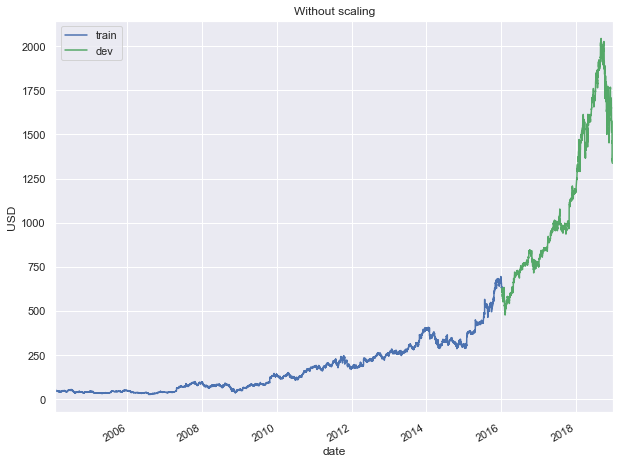

In [32]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
#ax = cv.plot(x='DATE', y='WEIGHTED AV. PRICE', style='y-', grid=True, ax=ax)
ax = test.plot(x='DATE', y='WEIGHTED AV. PRICE', style='g-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_title("Without scaling")

Text(0.5, 1.0, 'With scaling')

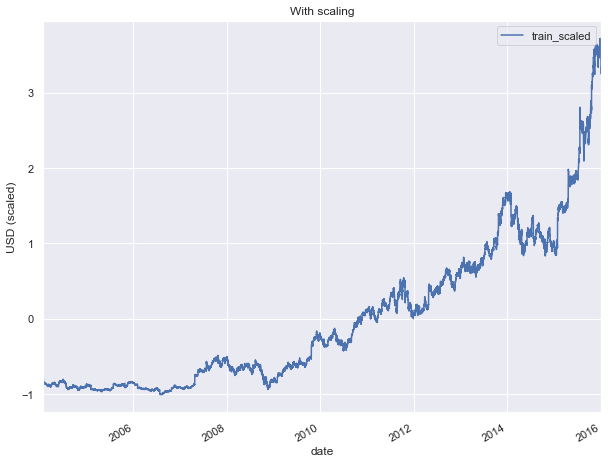

In [33]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train_scaled.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
ax.legend(['train_scaled'])
ax.set_xlabel("date")
ax.set_ylabel("USD (scaled)")
ax.set_title("With scaling")

REGRESSION

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
polynomial_features = PolynomialFeatures(degree=2,
                                                 include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
model = pipeline.fit(X_train_scaled, y_train_scaled)


In [35]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#results = []
rmse1 = []
mape1 = []


First we are going to see if a polynomial model will model the data well enough. We will train using degrees 1 to 4 and look at teh loss functions.

***SVR***
<br>
We are going to run the same model paramters we identified for the Apple stock C=1/8 and gamma = 1/2

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CPU times: user 16.1 s, sys: 212 ms, total: 16.3 s
Wall time: 16.6 s


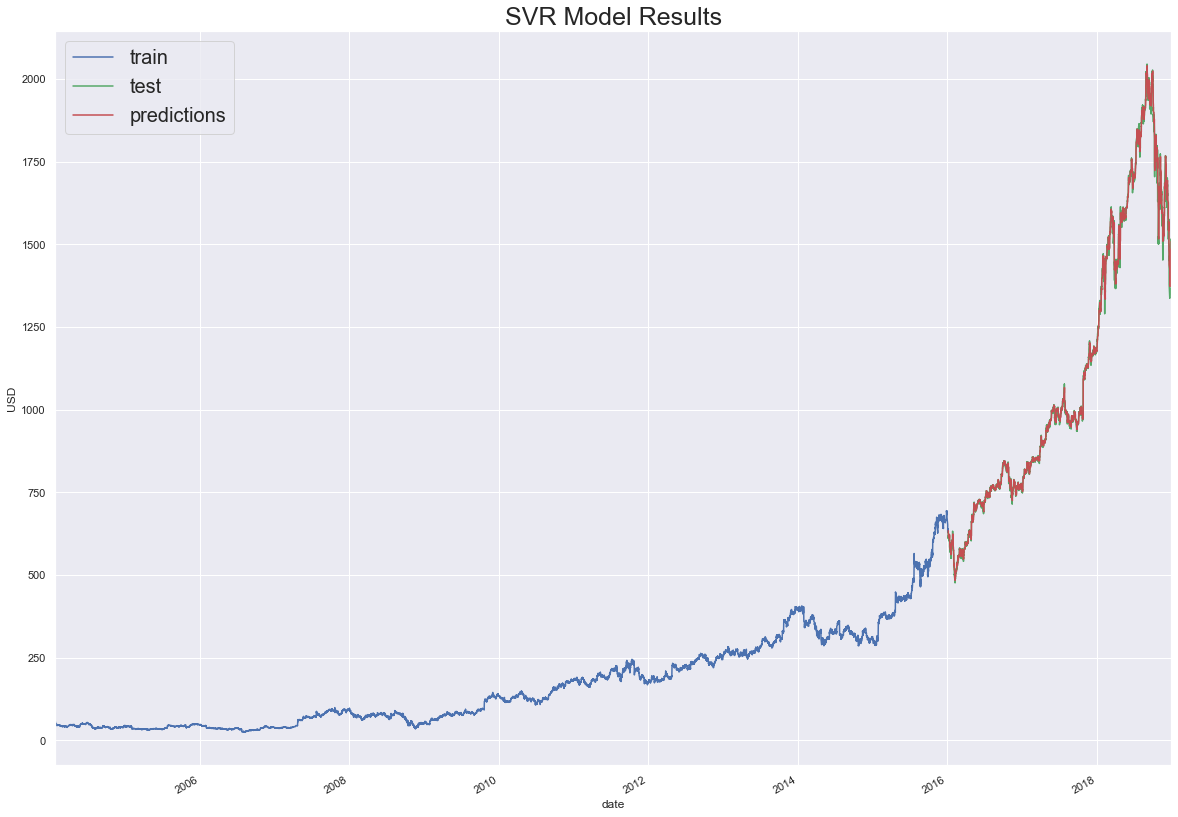

In [40]:
%%time
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import sys
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
results = []
val = []
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)
c = 1/8
g = 1/2
svr = SVR(kernel= 'rbf', C=1/8, gamma=1/2)
model = svr.fit(X_train_scaled, y_train_scaled)
est_scaled = model.predict(X_sample_scaled)
test['est_scaled'] = est_scaled
test['est'] = test['est_scaled'] * test['WEIGHTED AV. PRICE_std'] + test['WEIGHTED AV. PRICE_mean']
mse = mean_squared_error(y_sample, test['est'])
mae = mean_absolute_error(y_sample, test['est'])
rmse = math.sqrt(mean_squared_error(y_sample, test['est']))
mape = get_mape(y_sample, test['est'])
acc = model.score( X_sample, test['est'].values.reshape(-1,1))
r2 = r2_score(y_sample, test['est'])
vals = [rmse,mape,c,g,acc,r2, mse, mae]
results.append(vals)

rcParams['figure.figsize'] = 20, 15 # width 10, height 8

est_df = pd.DataFrame({'est': test['est'], 
                   'DATE': test['DATE']})

ax = train.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
#ax = cv.plot(x='DATE', y='WEIGHTED AV. PRICE', style='y-', grid=True, ax=ax)
ax = test.plot(x='DATE', y='WEIGHTED AV. PRICE', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='DATE', y='est', style='r-', grid=True, ax=ax)
ax.legend(['train','test', 'predictions'])
ax.set_title('SVR Model Results', fontsize=25)
ax.set_xlabel("date")
ax.set_ylabel("USD")
        



Text(0, 0.5, 'USD')

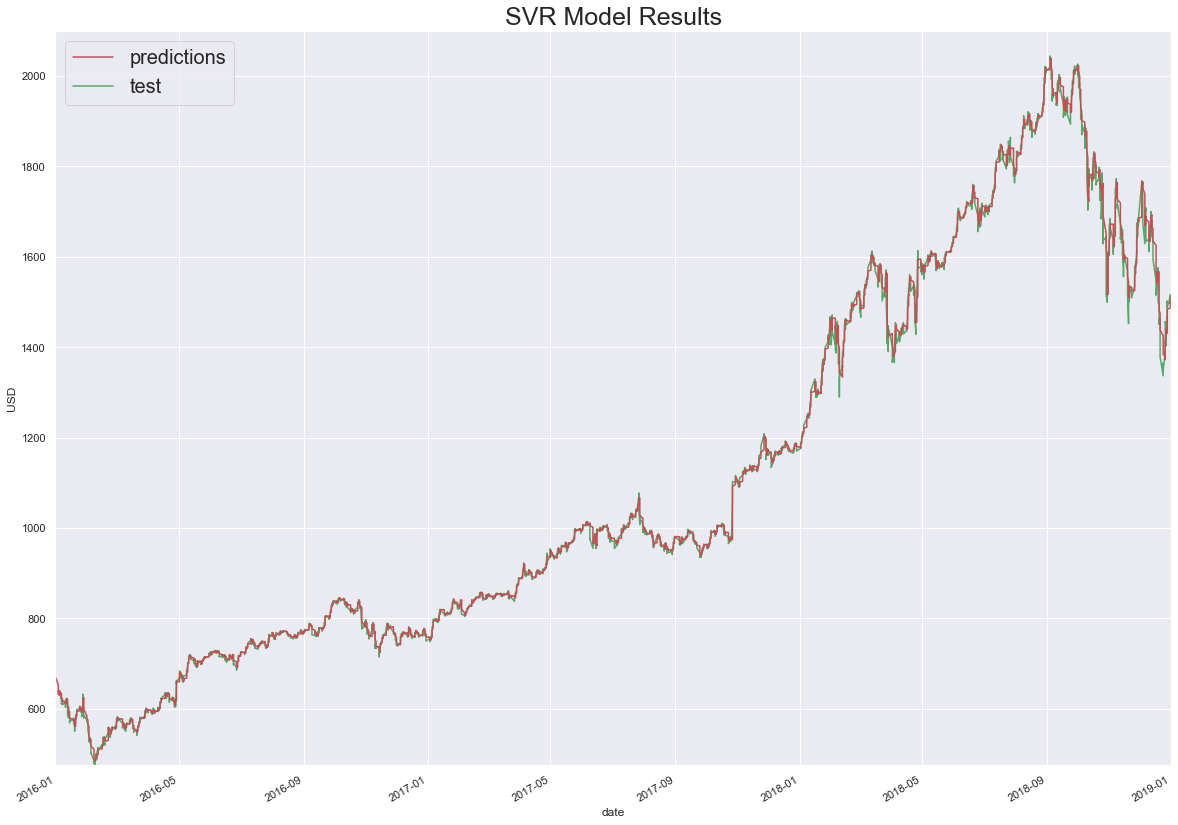

In [51]:
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)
rcParams['figure.figsize'] = 20, 15 # width 10, height 8

est_df = pd.DataFrame({'est': test['est'], 
                   'DATE': test['DATE']})

ax = train.plot(x='DATE', y='WEIGHTED AV. PRICE', style='r-', grid=True)
#ax = cv.plot(x='DATE', y='WEIGHTED AV. PRICE', style='r-', grid=True, ax=ax)
ax = test.plot(x='DATE', y='WEIGHTED AV. PRICE', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='DATE', y='est', style='r-', grid=True, ax=ax)
ax.legend(['predictions', 'test'])
ax.set_title('SVR Model Results', fontsize=25)
ax.set_xlabel("date")
ax.set_xlim(['2016', '2019'])
ax.set_ylim([475, 2100])
ax.set_ylabel("USD")

In [52]:
print("RMSE:", rmse )
print("MAPE:", mape )
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

RMSE: 14.915297360686592
MAPE: 0.7432703560892636
MSE: 222.4660953577044
MAE: 8.543834612887377
R^2: 0.9987435782669752
